In [2]:
# Import Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import csv data
df = pd.read_csv("daily_weather_data.csv")
df2 = pd.read_csv("co2_mm_mlo.csv")

# Convert date into datetime index
df["date"] = pd.to_datetime(df["date"], format="%d-%m-%Y")
df = df.set_index(["date"])
df2["date"] = pd.to_datetime(df2["year"].astype(str)+ df2["month"].astype(str), format = "%Y%m")
df2 = df2.set_index(['date'])

# Time range
starttime = "2018-1-1"
endtime = "2022-1-1"

# More dataframes
avgPerDate = df.groupby(["date"]).mean()[starttime:endtime]
avgPerCountry = df[starttime:endtime].groupby(["country"]).mean()

Text(0.5, 1.0, "Every Country's Temperature, Pressure, and Windspeed from 2018-1-1 to 2022-1-1")

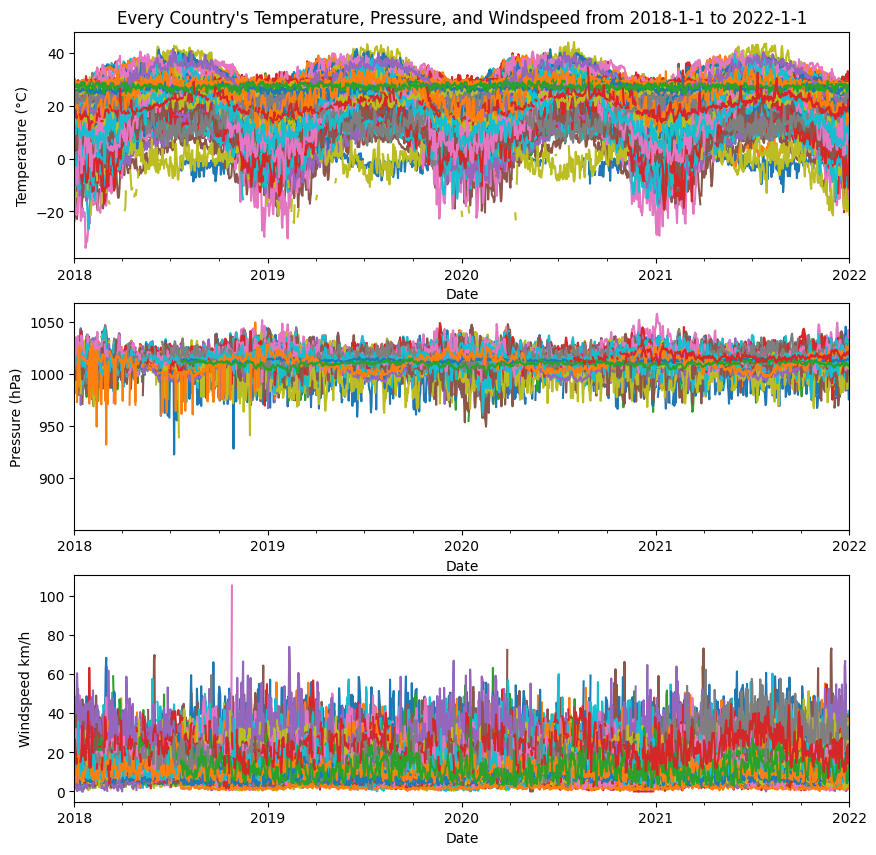

In [178]:
fig, axes = plt.subplots(nrows=3, figsize=(10,10))
for cntry in df["country"].unique():
    df.loc[df["country"]==cntry][starttime:endtime]["tavg"].plot(ax=axes[0], kind="line", xlabel="Date", ylabel="Temperature (\u00b0C)")
for cntry in df["country"].unique():
    df.loc[df["country"]==cntry][starttime:endtime]["pres"].plot(ax=axes[1],kind="line", xlabel="Date", ylabel="Pressure (hPa)")
for cntry in df["country"].unique():
    df.loc[df["country"]==cntry][starttime:endtime]["wspd"].plot(ax=axes[2],kind="line", xlabel="Date", ylabel="Windspeed km/h")
axes[0].set_title(f"Every Country's Temperature, Pressure, and Windspeed from {starttime} to {endtime}")

Text(0.5, 1.0, "World's Average Temperature, Pressure, and Windspeed from 2018-1-1 to 2022-1-1")

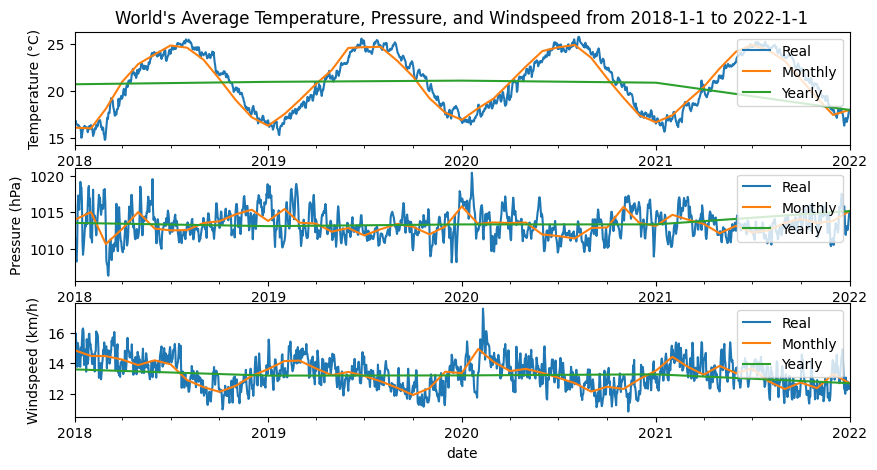

In [8]:
fig, axes = plt.subplots(nrows=3, figsize=(10,5), )

avgPerDate["tavg"].plot(ax=axes[0], ylabel="Temperature (\u00b0C)", label="Real")
avgPerDate["tavg"].resample("M").mean().plot(ax=axes[0], label="Monthly")
avgPerDate["tavg"].resample("Y").mean().plot(ax=axes[0], label="Yearly")
axes[0].legend(loc="upper right")

avgPerDate["pres"].plot(ax=axes[1], ylabel="Pressure (hPa)", label="Real")
avgPerDate["pres"].resample("M").mean().plot(ax=axes[1], label="Monthly")
avgPerDate["pres"].resample("Y").mean().plot(ax=axes[1], label="Yearly")
axes[1].legend(loc="upper right")

avgPerDate["wspd"].plot(ax=axes[2], ylabel="Windspeed (km/h)", label="Real")
avgPerDate["wspd"].resample("M").mean().plot(ax=axes[2], label="Monthly")
avgPerDate["wspd"].resample("Y").mean().plot(ax=axes[2], label="Yearly")
axes[2].legend(loc="upper right")
axes[0].set_title(f"World's Average Temperature, Pressure, and Windspeed from {starttime} to {endtime}")

Text(-50, 5, 'corr = -0.22')

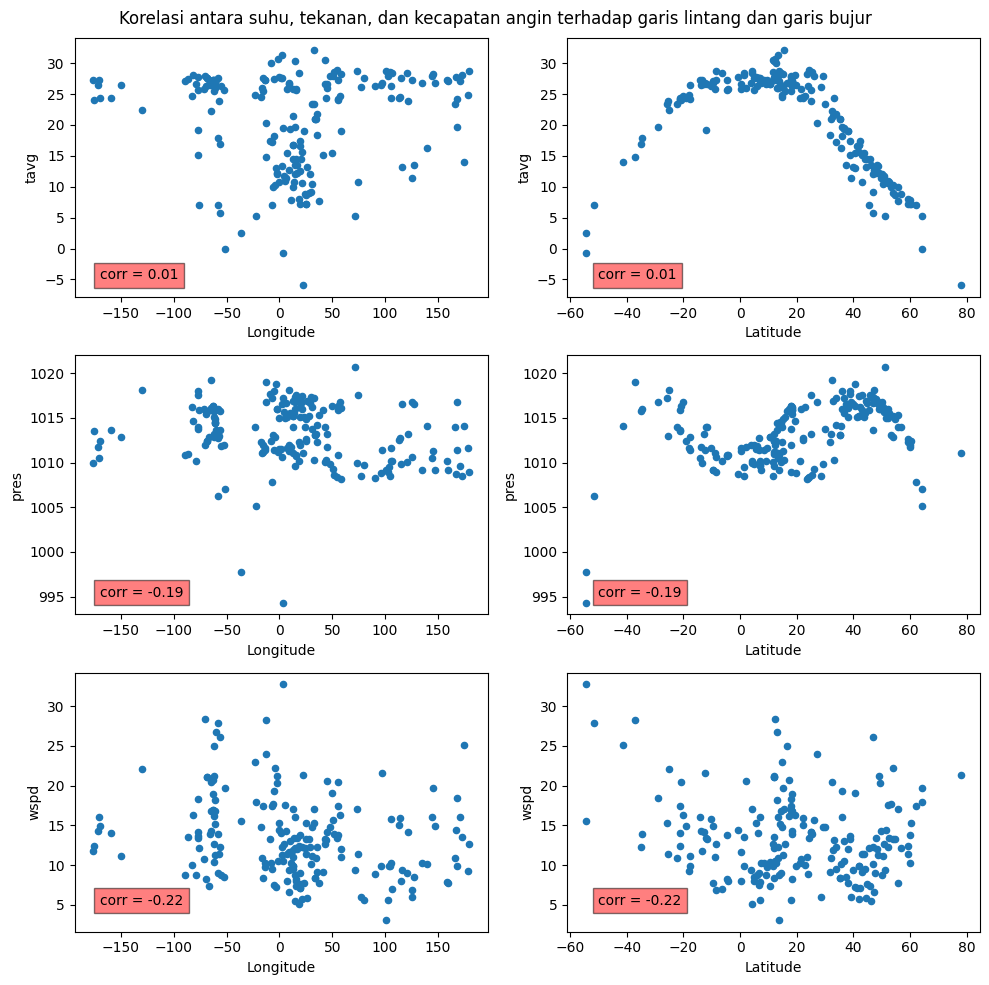

In [102]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10,10))
avgPerCountry.plot(ax = axes[0,0], kind="scatter", x="Longitude", y="tavg")
avgPerCountry.plot(ax = axes[1,0], kind="scatter", x="Longitude", y="pres")
avgPerCountry.plot(ax = axes[2,0], kind="scatter", x="Longitude", y="wspd")

avgPerCountry.plot(ax = axes[0,1], kind="scatter", x="Latitude", y="tavg")
avgPerCountry.plot(ax = axes[1,1], kind="scatter", x="Latitude", y="pres")
avgPerCountry.plot(ax = axes[2,1], kind="scatter", x="Latitude", y="wspd")

fig.suptitle("Korelasi antara suhu, tekanan, dan kecapatan angin terhadap garis lintang dan garis bujur")
fig.tight_layout()
axes[0,0].text(-170,-5,f"corr = {'{:.2f}'.format(avgPerCountry['Longitude'].corr(avgPerCountry['tavg']))}", bbox={"facecolor":"red","alpha":0.5})
axes[1,0].text(-170,995,f"corr = {'{:.2f}'.format(avgPerCountry['Longitude'].corr(avgPerCountry['pres']))}", bbox={"facecolor":"red","alpha":0.5})
axes[2,0].text(-170,5,f"corr = {'{:.2f}'.format(avgPerCountry['Longitude'].corr(avgPerCountry['wspd']))}", bbox={"facecolor":"red","alpha":0.5})
axes[0,1].text(-50,-5,f"corr = {'{:.2f}'.format(avgPerCountry['Longitude'].corr(avgPerCountry['tavg']))}", bbox={"facecolor":"red","alpha":0.5})
axes[1,1].text(-50,995,f"corr = {'{:.2f}'.format(avgPerCountry['Longitude'].corr(avgPerCountry['pres']))}", bbox={"facecolor":"red","alpha":0.5})
axes[2,1].text(-50,5,f"corr = {'{:.2f}'.format(avgPerCountry['Longitude'].corr(avgPerCountry['wspd']))}", bbox={"facecolor":"red","alpha":0.5})

Text(10, -10, '           2\n-0.007221 x + 0.04683 x + 27.76')

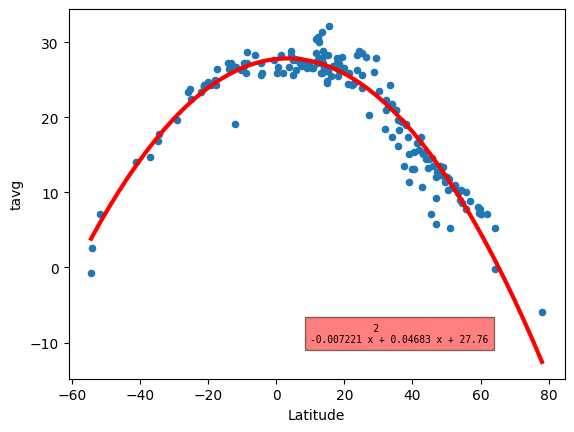

In [6]:
avgPerCountry.plot(kind="scatter", x="Latitude", y="tavg")
temp = df[["Latitude", "tavg"]].dropna()
model = np.poly1d(np.polyfit(temp["Latitude"], temp["tavg"], 2))
polyline = np.linspace(temp["Latitude"].min(),temp["Latitude"].max())
plt.plot(polyline, model(polyline), color="red", lw=3)
plt.text(10,-10,model, bbox={"facecolor":"red","alpha":0.5}, fontsize="x-small", fontfamily="monospace")

Text(-45, 1000, '           5             4             3            2\n3.132e-08 x - 3.703e-06 x - 2.899e-05 x + 0.009271 x - 0.02366 x + 1010')

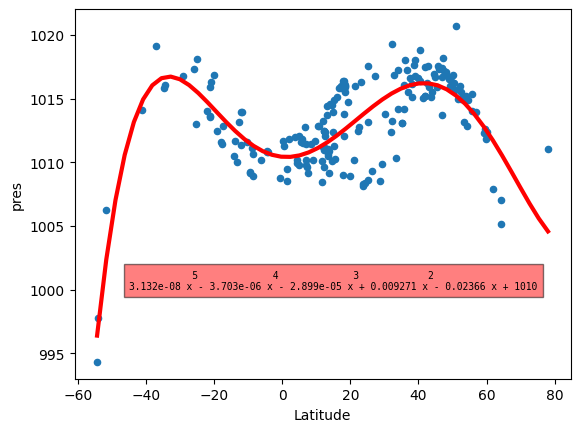

In [96]:
avgPerCountry.plot(kind="scatter", x="Latitude", y="pres")
temp = df[["Latitude", "pres"]].dropna()
model = np.poly1d(np.polyfit(temp["Latitude"], temp["pres"], 5))
polyline = np.linspace(temp["Latitude"].min(),temp["Latitude"].max())
plt.plot(polyline, model(polyline), color="red", lw=3)
plt.text(-45,1000,model, bbox={"facecolor":"red","alpha":0.5}, fontsize='x-small', fontfamily="monospace")


Koefisien korelasi level CO2 dengan suhu dengan shift CO2 0 bulan ke kanan = 0.00
Koefisien korelasi level CO2 dengan suhu dengan shift CO2 1 bulan ke kanan = 0.31
Koefisien korelasi level CO2 dengan suhu dengan shift CO2 2 bulan ke kanan = 0.53
Koefisien korelasi level CO2 dengan suhu dengan shift CO2 3 bulan ke kanan = 0.61
Koefisien korelasi level CO2 dengan suhu dengan shift CO2 4 bulan ke kanan = 0.53
Koefisien korelasi level CO2 dengan suhu dengan shift CO2 5 bulan ke kanan = 0.33


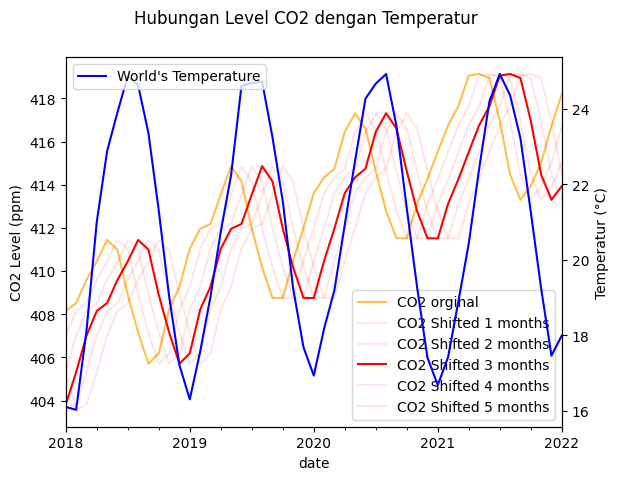

In [56]:
print("Koefisien korelasi level CO2 dengan suhu dengan shift CO2 0 bulan ke kanan = ", end="")
print("{:.2f}".format(df2.shift(0)[starttime:endtime]["average"].corr(avgPerDate["tavg"].resample("MS").mean())))
for i in range(1,6):
    print(f"Koefisien korelasi level CO2 dengan suhu dengan shift CO2 {i} bulan ke kanan = ", end="")
    print("{:.2f}".format(df2.shift(i)[starttime:endtime]["average"].corr(avgPerDate["tavg"].resample("MS").mean())))
fig, ax = plt.subplots()
ax2 = ax.twinx()

df2.shift(0)[starttime:endtime]["average"].plot(ax = ax, color="orange", ylabel="CO2 Level (ppm)", label="CO2 orginal", alpha=0.7)
df2.shift(1)[starttime:endtime]["average"].plot(ax = ax, color="red", label="CO2 Shifted 1 months", alpha=0.1)
df2.shift(2)[starttime:endtime]["average"].plot(ax = ax, color="red", label="CO2 Shifted 2 months", alpha=0.1)
df2.shift(3)[starttime:endtime]["average"].plot(ax = ax, color="red", label="CO2 Shifted 3 months")
df2.shift(4)[starttime:endtime]["average"].plot(ax = ax, color="red", label="CO2 Shifted 4 months", alpha=0.1)
df2.shift(5)[starttime:endtime]["average"].plot(ax = ax, color="red", label="CO2 Shifted 5 months", alpha=0.1)
avgPerDate["tavg"].resample("M").mean().plot(ax = ax2,color="blue", ylabel="Temperatur (\u00b0C)", label = "World's Temperature")
fig.suptitle("Hubungan Level CO2 dengan Temperatur")
ax.legend(loc="lower right")
ax2.legend(loc="upper left")


